In [34]:
import numpy as np
import pandas as pd
import os

In [36]:
data = pd.read_csv('./housing.csv')
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [37]:
data.shape

(20640, 10)

In [38]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [39]:
data.describe()[['median_income','median_house_value']]

,median_income,median_house_value
count,20640.000000,20640.000000
mean,3.870671,206855.816909
std,1.899822,115395.615874
min,0.499900,14999.000000
25%,2.563400,119600.000000
50%,3.534800,179700.000000
75%,4.743250,264725.000000
max,15.000100,500001.000000


In [40]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

<Axes: >

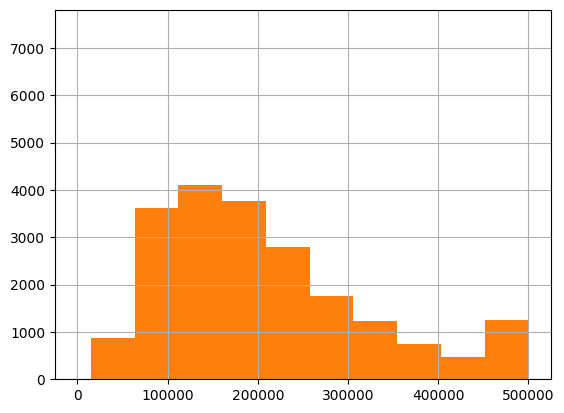

In [42]:
data.median_income.hist()
data.median_house_value.hist()

{'whiskers': [<matplotlib.lines.Line2D at 0x15a458214f0>,
 'caps': [<matplotlib.lines.Line2D at 0x15a45822bd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x15a458a4290>],
 'medians': [<matplotlib.lines.Line2D at 0x15a45822fc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x15a45823350>],
 'means': []}

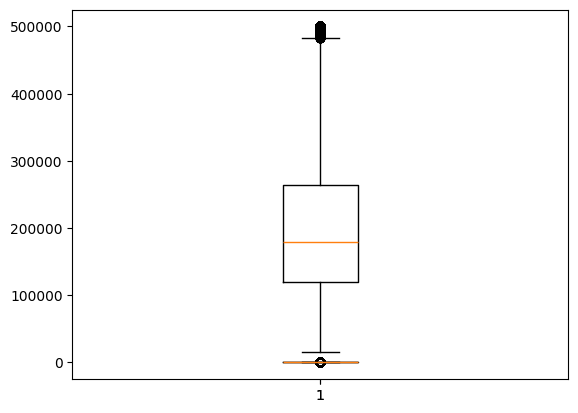

In [44]:
import matplotlib.pyplot as plt
plt.boxplot(data.median_income)
plt.boxplot(data.median_house_value)

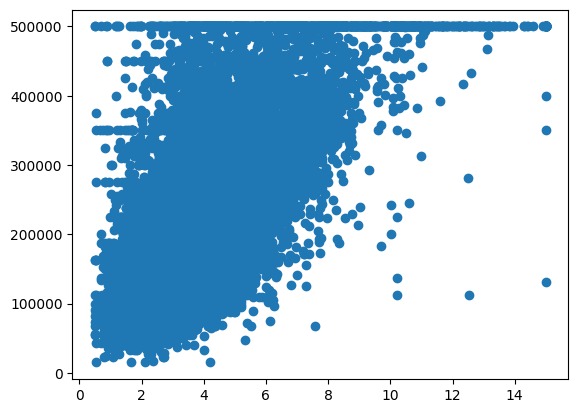

In [45]:
plt.scatter(data.median_income, data.median_house_value)

In [50]:
data = data.select_dtypes(include=['float64', 'int64'])
data.corr()[['median_income','median_house_value']]

,median_income,median_house_value
longitude,-0.015176,-0.045967
latitude,-0.079809,-0.144160
housing_median_age,-0.119034,0.105623
total_rooms,0.198050,0.134153
total_bedrooms,-0.007723,0.049686
population,0.004834,-0.024650
households,0.013033,0.065843
median_income,1.000000,0.688075
median_house_value,0.688075,1.000000


In [51]:
x=data.median_income.values.reshape(-1,1)
x
y=data.median_house_value.values.reshape(-1,1)
y

array([[452600.],
       [358500.],
       [352100.],
       ...,
       [ 92300.],
       [ 84700.],
       [ 89400.]])

In [52]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
x_train.shape,x_test.shape,y_train.shape,y_test.shape 

((16512, 1), (4128, 1), (16512, 1), (4128, 1))

In [53]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x_train,y_train) 

LinearRegression()

In [54]:
y_pred= lm.intercept_+lm.coef_*x_train
y_pred 

array([[164768.89577283],
       [243994.01845332],
       [267670.92395575],
       ...,
       [207031.48296266],
       [214862.52861746],
       [220454.93935441]])

In [55]:
#Prediction for test dataset
y_pred=lm.predict(x_test)
y_pred 

array([[175707.30034345],
       [239349.68631031],
       [177448.92489708],
       ...,
       [301104.26820465],
       [145063.8966265 ],
       [143547.80618773]])

In [56]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mean_absolute_error(y_test,y_pred),np.sqrt(mean_squared_error(y_test,y_pred)) 

(62227.14707418086, 83588.09062034528)

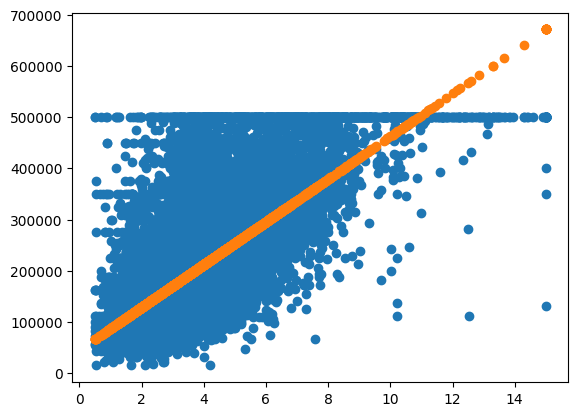

In [57]:
plt.scatter(x,y)
plt.scatter(x_test,y_pred)

(median_income            6.5004
 households            6082.0000
 housing_median_age      52.0000
 dtype: float64,
 median_income         0.4999
 households            2.0000
 housing_median_age    1.0000
 dtype: float64,
 348200.0,
 14999.0)

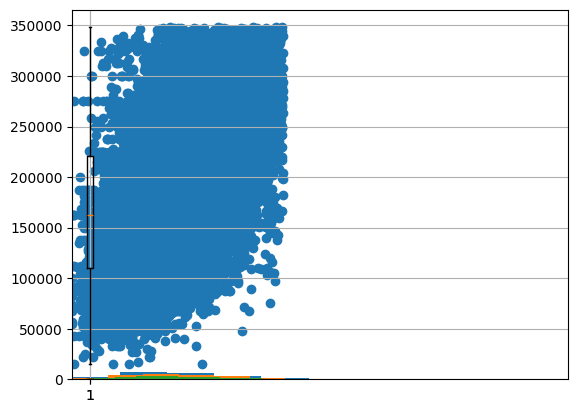

In [58]:
plt.hist(x[x<14])
data1=data[data.median_income<data.median_income.quantile(0.99)]
data1.median_income.hist()
data1=data[data.median_income<data.median_income.quantile(0.92)]
data1=data1[data1.median_house_value<data1.median_house_value.quantile(0.92)]
data1.median_income.hist()
data.shape,data1.shape
plt.boxplot(data1.median_income)
plt.boxplot(data1.median_house_value)
plt.scatter(data1.median_income,data1.median_house_value)
data1.columns
x=data1[['median_income','households','housing_median_age']]
y=data1.median_house_value.values.reshape(-1,1)
x.max(),x.min(),y.max(),y.min()

In [61]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=0.2)
x_train.shape,y_train.shape, x_test.shape,y_test.shape
x_train.max(),y_train.max(), x_test.max(),y_test.max()

(median_income            6.5
 households            5358.0
 housing_median_age      52.0
 dtype: float64,
 348200.0,
 median_income            6.5004
 households            6082.0000
 housing_median_age      52.0000
 dtype: float64,
 348200.0)

In [62]:
# Building model using sklearn
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x_train,y_train)
# Display the parameters of model
lm.get_params() 

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [63]:
# Display the coefficients of input features
lm.coef_
# Display the intercept
lm.intercept_ 

array([-8366.54602637])

In [64]:
y_test_pred=lm.predict(x_test)
mean_absolute_error(y_test,y_test_pred) 

45165.81980731312

In [71]:
newval=pd.DataFrame({'median_income':[4,6,3],'households':[5,4,2],'housing_median_age':[20,12,30]})
lm.predict(newval) 

array([[164028.70457259],
       [225050.85841451],
       [141764.25053113]])